In [2]:
import pandas as pd

# Load the dataset
file_path = "data.csv"
df = pd.read_csv(file_path)

# Display basic info about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56978 entries, 0 to 56977
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Recipe URL            51978 non-null  object 
 1   Recipe name           56971 non-null  object 
 2   Preparation time      56971 non-null  object 
 3   Servings              48944 non-null  object 
 4   List of ingredients   56959 non-null  object 
 5   List of instructions  56907 non-null  object 
 6   Category              56803 non-null  object 
 7   Region/Cuisine        31923 non-null  object 
 8   Calories_Per_Serving  5000 non-null   float64
dtypes: float64(1), object(8)
memory usage: 3.9+ MB


In [3]:
df.head()

,Recipe URL,Recipe name,Preparation time,Servings,List of ingredients,List of instructions,Category,Region/Cuisine,Calories_Per_Serving
0,https://www.food.com/recipe/cheesy-grits-casse...,Cheesy Grits Casserole,1hr 5mins,6,"4cupswater, 1teaspoonsalt, 1cupquick-cooking g...",Heat water and salt to boiling. Gradually add ...,Oven,NaN,NaN
1,https://www.food.com/recipe/crock-pot-beer-bra...,Crock Pot Beer Brats,7hrs 20mins,4,"8bratwursts, 2tablespoonsolive oil, 2garlic cl...",Heat oil and garlic in a large skillet; add br...,Pork,NaN,NaN
2,https://www.food.com/recipe/banana-bread-with-...,Banana Bread With Coconut Milk,40mins,10,"4ripe mashedbananas, 71⁄2ounces canscoconut mi...","Mix wet ingredients, and dry ingredients. Mixt...",Quick Breads,NaN,NaN
3,https://www.food.com/recipe/pasta-salad-suprem...,Pasta Salad Supreme,25mins,6,16ouncesrotini pastaor 16 ouncesshell pasta(...,"Cook pasta, rinse under cold water and drain w...",Vegetable,NaN,NaN
4,https://www.food.com/recipe/bread-machine-monk...,Bread Machine Monkey Pull Aparts,1hr 10mins,11,"11⁄2teaspoonsactive dry yeast, 11⁄4cupsbread f...","Add ingredients to your bread maker, according...",Breads,NaN,NaN


In [4]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Count the number of duplicate rows
duplicate_rows = df.duplicated().sum()

# Display results
missing_values, duplicate_rows


(Recipe URL               5000
 Recipe name                 7
 Preparation time            7
 Servings                 8034
 List of ingredients        19
 List of instructions       71
 Category                  175
 Region/Cuisine          25055
 Calories_Per_Serving    51978
 dtype: int64,
 np.int64(6966))

In [5]:
# Count the number of rows with missing or zero preparation time
missing_time_count = (df['Preparation time'].isna() | (df['Preparation time'] == 0)).sum()

# Print the count
print("Number of recipes with missing or zero preparation time:", missing_time_count)


Number of recipes with missing or zero preparation time: 7


In [6]:
# Count the number of rows with missing (NaN) preparation time
nan_time_count = df['Preparation time'].isna().sum()

# Print the count
print("Number of recipes with missing (NaN) preparation time:", nan_time_count)


Number of recipes with missing (NaN) preparation time: 7


In [7]:
import re

In [8]:
# Function to clean text while keeping numeric characters
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Keep only alphanumeric characters and spaces
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply the function to relevant text columns while keeping numeric characters
text_columns = ['Recipe name', 'List of ingredients', 'List of instructions', 'Category', 'Region/Cuisine']
for col in text_columns:
    df[col] = df[col].apply(clean_text)




In [9]:
# Step 1: Handle Missing Values
df['Region/Cuisine'].fillna('Unknown', inplace=True)  # Replace missing regions with 'Unknown'
df['Calories_Per_Serving'].fillna(df['Calories_Per_Serving'].median(), inplace=True)  # Fill missing calories with median





C:\Users\HP\AppData\Local\Temp\ipykernel_11764\1549937986.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Region/Cuisine'].fillna('Unknown', inplace=True)  # Replace missing regions with 'Unknown'
C:\Users\HP\AppData\Local\Temp\ipykernel_11764\1549937986.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [10]:
# Count the number of rows with missing or zero preparation time
missing_time_count = (df['Preparation time'].isna() | (df['Preparation time'] == 0)).sum()

# Print the count
print("Number of recipes with missing or zero preparation time:", missing_time_count)


Number of recipes with missing or zero preparation time: 7


In [11]:
# Remove duplicate rows
df = df.drop_duplicates()

# Print the number of rows after removing duplicates
num_rows_after_deduplication = df.shape[0]
num_rows_after_deduplication


50012

In [12]:
# Check how many rows now have missing (NaN) or zero preparation time
missing_or_zero_time_count = df['Preparation time'].isna().sum() + (df['Preparation time'] == 0).sum()

# Print the count
print("Number of recipes with missing or zero preparation time:", missing_or_zero_time_count)

# Investigate what values exist in the "Preparation time" column
print("\nUnique values in Preparation time column:")
print(df['Preparation time'].unique())


Number of recipes with missing or zero preparation time: 5

Unique values in Preparation time column:
['1hr 5mins' '7hrs 20mins' '40mins' '25mins' '1hr 10mins' '1hr 15mins'
 '6hrs 8mins' '45mins' '8hrs 5mins' '35mins' '1hr' '1hr 30mins' '5mins'
 '15mins' '168hrs 30mins' '1hr 20mins' '504hrs 30mins' '10hrs 20mins'
 '2hrs 10mins' '30mins' '2mins' '13mins' '29mins' '2hrs 20mins' '20mins'
 '3hrs 40mins' '28mins' '50mins' '55mins' '2hrs 8mins' '1hr 40mins'
 '21mins' '1hr 35mins' '4' '8hrs 15mins' '10mins' '4hrs 50mins'
 '2hrs 35mins' '1hr 45mins' '4hrs 20mins' '3' '2hrs 50mins' '1hr 25mins'
 '48hrs 25mins' '1min' '22mins' '3hrs 55mins' '5hrs 20mins' '26mins'
 '3hrs 35mins' '2hrs 15mins' '11' '48mins' '42mins' '17mins' '8hrs 10mins'
 '12mins' '3hrs 15mins' '4mins' '7hrs 15mins' '18mins' '6hrs 10mins'
 '2hrs' '38mins' '23mins' '10' '3hrs 5mins' '2hrs 30mins' '10hrs 30mins'
 '7mins' '16mins' '17hrs' '2hrs 5mins' '11mins' '47mins' '6hrs 30mins'
 '24hrs' '7' '1hr 22mins' '24hrs 5mins' '265hrs' '

In [13]:
import numpy as np

In [14]:
# Function to clean and convert various time formats into total minutes
def convert_time_to_minutes(time_str):
    if isinstance(time_str, str):
        time_str = time_str.lower().replace(" ", "")  # Remove spaces for consistency

        # Extract hours and minutes
        hours_match = re.findall(r'(\d+)hrs?', time_str)  # Match "5hrs" or "5 hrs"
        minutes_match = re.findall(r'(\d+)mins?', time_str)  # Match "30mins" or "30 mins"

        minutes = 0
        if hours_match:
            minutes += int(hours_match[0]) * 60  # Convert hours to minutes
        if minutes_match:
            minutes += int(minutes_match[0])  # Add minutes

        # Handle cases where time is a standalone number (e.g., "4", "10", etc.)
        if not hours_match and not minutes_match:
            try:
                numeric_value = int(time_str)
                if numeric_value < 24:  # Assume values < 24 are hours, convert to minutes
                    minutes = numeric_value * 60
                else:  # Assume direct minutes if the number is large
                    minutes = numeric_value
            except ValueError:
                return np.nan  # If conversion fails, return NaN

        return minutes

    return np.nan  # Return NaN if not a string

# Apply the function to the dataset
df['Preparation time'] = df['Preparation time'].apply(convert_time_to_minutes)

# Display the first few rows to verify conversion
print(df[['Recipe name', 'Preparation time']].head(20))


                              Recipe name  Preparation time
0                  cheesy grits casserole              65.0
1                    crock pot beer brats             440.0
2          banana bread with coconut milk              40.0
3                     pasta salad supreme              25.0
4        bread machine monkey pull aparts              70.0
5           low carb pizza zucchini crust              75.0
6                    hamburgercrust pizza              25.0
7                crock pot cheesy spinach             368.0
8      jalapeno macaroni cheese casserole              45.0
9   easy delicious slow cooker roast beef             485.0
10               crock pot cheesy spinach             368.0
11                   festive skillet corn              25.0
12               lovely beets and carrots              25.0
13         deep dark chocolate moist cake              35.0
14                    baja vegetable stew              60.0
15     jalapeno macaroni cheese casserol

In [15]:

df.head(100)

,Recipe URL,Recipe name,Preparation time,Servings,List of ingredients,List of instructions,Category,Region/Cuisine,Calories_Per_Serving
0,https://www.food.com/recipe/cheesy-grits-casse...,cheesy grits casserole,65.0,6,4cupswater 1teaspoonsalt 1cupquickcooking grit...,heat water and salt to boiling gradually add g...,oven,Unknown,493.0
1,https://www.food.com/recipe/crock-pot-beer-bra...,crock pot beer brats,440.0,4,8bratwursts 2tablespoonsolive oil 2garlic clov...,heat oil and garlic in a large skillet add bra...,pork,Unknown,493.0
2,https://www.food.com/recipe/banana-bread-with-...,banana bread with coconut milk,40.0,10,4ripe mashedbananas 712ounces canscoconut milk...,mix wet ingredients and dry ingredients mixtur...,quick breads,Unknown,493.0
3,https://www.food.com/recipe/pasta-salad-suprem...,pasta salad supreme,25.0,6,16ouncesrotini pastaor 16 ouncesshell pastasom...,cook pasta rinse under cold water and drain we...,vegetable,Unknown,493.0
4,https://www.food.com/recipe/bread-machine-monk...,bread machine monkey pull aparts,70.0,11,112teaspoonsactive dry yeast 114cupsbread flou...,add ingredients to your bread maker according ...,breads,Unknown,493.0
...,...,...,...,...,...,...,...,...,...
112,https://www.food.com/recipe/double-chocolate-b...,double chocolate banana snack cake,65.0,11,2cupsflour 1cupsugar 2tablespoons unsweetened ...,mix together flour sugar cocoa baking soda and...,dessert,Unknown,493.0
113,https://www.food.com/recipe/steamed-rice-68340,steamed rice,30.0,7,1cup uncookedlonggrain rice 2tablespoonsbutter...,saute rice in butter just until translucent an...,lunchsnacks,Unknown,493.0
114,https://www.food.com/recipe/anadama-oatmeal-br...,blueberry lemonade,20.0,4,13cupfresh lemon juice 2cupswater 2cupsfresh b...,add all the ingredients to the container of a ...,beverages,Unknown,493.0
116,https://www.food.com/recipe/blueberry-lemonade...,blueberry lemonade,20.0,4,13cupfresh lemon juice 2cupswater 2cupsfresh b...,add all the ingredients to the container of a ...,beverages,Unknown,493.0


In [16]:
# Convert "Servings" to numeric, coercing errors to NaN
df['Servings'] = pd.to_numeric(df['Servings'], errors='coerce')

# Fill missing values with the mean (rounded)
df['Servings'].fillna(round(df['Servings'].mean()), inplace=True)

# Ensure "Preparation time" is numeric before filling missing values
df['Preparation time'].fillna(df['Preparation time'].mean(), inplace=True)

# Fill missing values in categorical/text columns
df['Recipe name'].fillna('no name', inplace=True)
df['List of ingredients'].fillna('no ingredients', inplace=True)
df['List of instructions'].fillna('no instructions', inplace=True)
df['Category'].fillna('no category', inplace=True)




C:\Users\HP\AppData\Local\Temp\ipykernel_11764\4274906756.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Servings'].fillna(round(df['Servings'].mean()), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_11764\4274906756.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [17]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Count the number of duplicate rows
duplicate_rows = df.duplicated().sum()

# Display results
missing_values, duplicate_rows


(Recipe URL              4996
 Recipe name                0
 Preparation time           0
 Servings                   0
 List of ingredients        0
 List of instructions       0
 Category                   0
 Region/Cuisine             0
 Calories_Per_Serving       0
 dtype: int64,
 np.int64(0))

In [18]:
print(df.head(10))  # To check the first 10 rows
df.to_csv("cleaned_data.csv", index=False)  # To save the cleaned dataset


                                          Recipe URL  \
0  https://www.food.com/recipe/cheesy-grits-casse...   
1  https://www.food.com/recipe/crock-pot-beer-bra...   
2  https://www.food.com/recipe/banana-bread-with-...   
3  https://www.food.com/recipe/pasta-salad-suprem...   
4  https://www.food.com/recipe/bread-machine-monk...   
5  https://www.food.com/recipe/low-carb-pizza-zuc...   
6  https://www.food.com/recipe/hamburger-crust-pi...   
7  https://www.food.com/recipe/crock-pot-cheesy-s...   
8  https://www.food.com/recipe/chilis-chicken-faj...   
9  https://www.food.com/recipe/easy-delicious-slo...   

                             Recipe name  Preparation time  Servings  \
0                 cheesy grits casserole              65.0       6.0   
1                   crock pot beer brats             440.0       4.0   
2         banana bread with coconut milk              40.0      10.0   
3                    pasta salad supreme              25.0       6.0   
4       bread machine m

In [19]:
# Print the total number of rows in the dataset
total_rows = df.shape[0]
print("Total number of rows in the dataset:", total_rows)


Total number of rows in the dataset: 50012


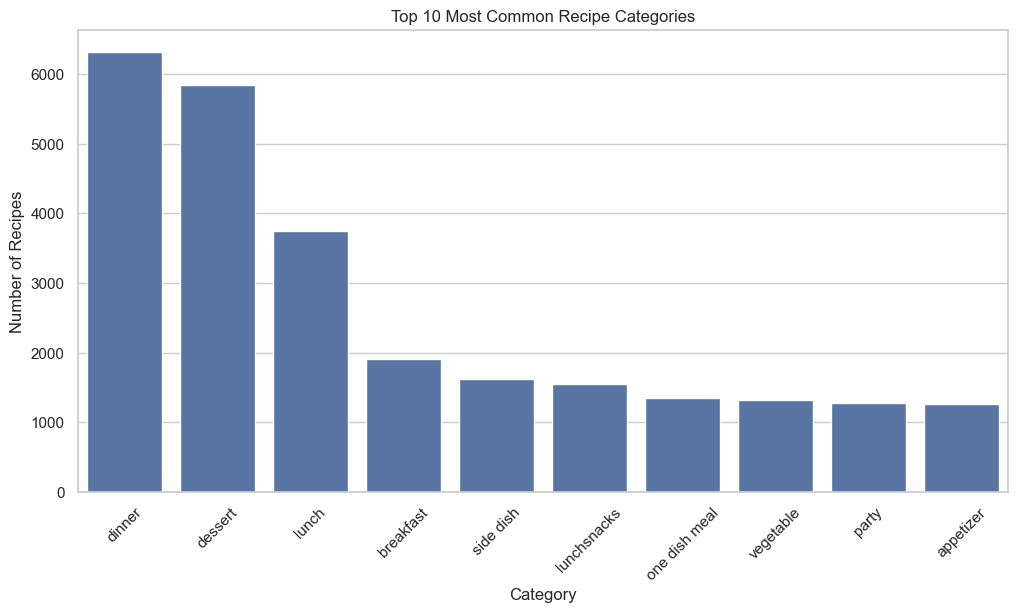

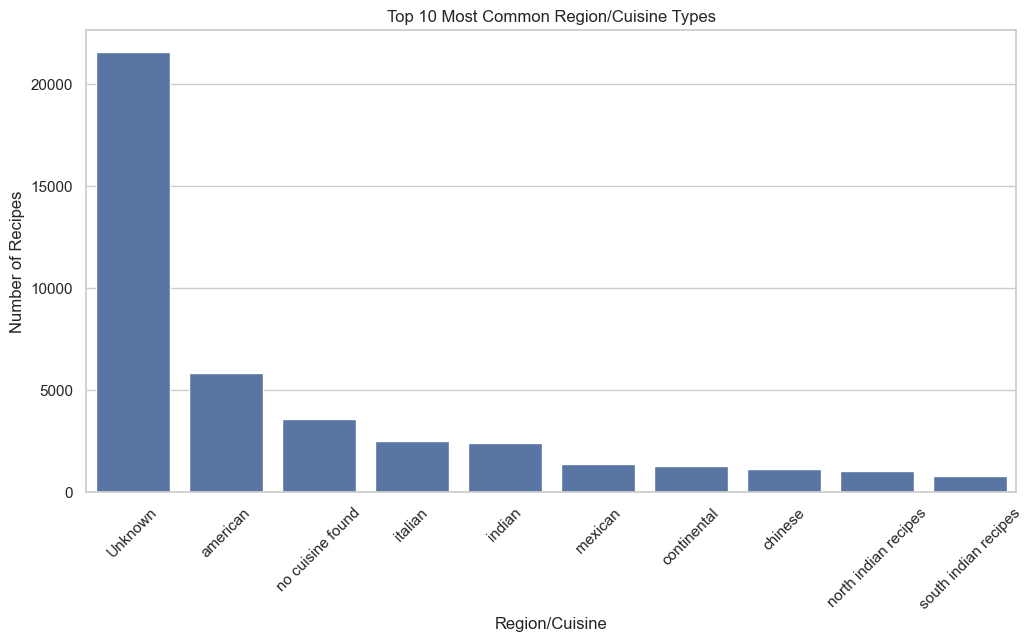

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")



# 3. Top 10 Most Common Categories
plt.figure(figsize=(12, 6))
top_categories = df['Category'].value_counts().nlargest(10)
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.xticks(rotation=45)
plt.title("Top 10 Most Common Recipe Categories")
plt.xlabel("Category")
plt.ylabel("Number of Recipes")
plt.show()



# 5. Top 10 Most Common Region/Cuisine Types
plt.figure(figsize=(12, 6))
top_regions = df['Region/Cuisine'].dropna().value_counts().nlargest(10)
sns.barplot(x=top_regions.index, y=top_regions.values)
plt.xticks(rotation=45)
plt.title("Top 10 Most Common Region/Cuisine Types")
plt.xlabel("Region/Cuisine")
plt.ylabel("Number of Recipes")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11764\3583419610.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prep_time_counts.index, y=prep_time_counts.values, palette="Blues_r")


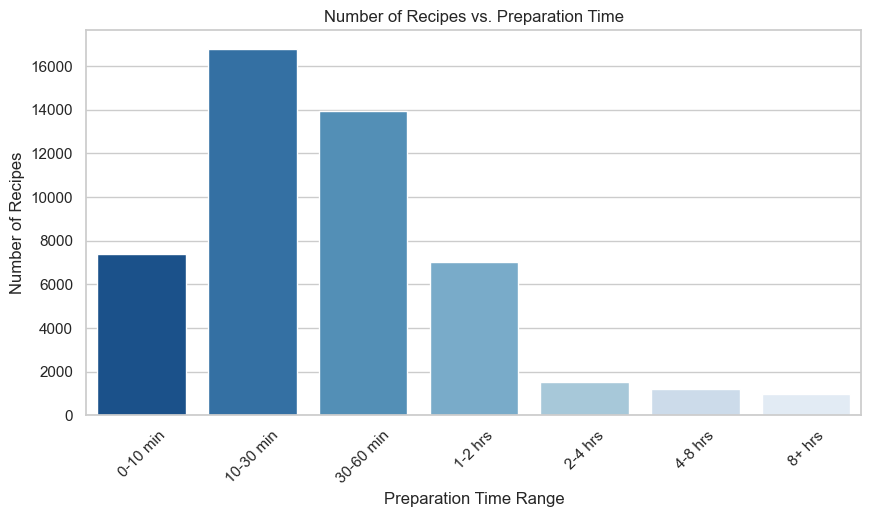

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define bins and labels
bins = [0, 10, 30, 60, 120, 240, 500, 1000]  # Ranges in minutes
labels = ["0-10 min", "10-30 min", "30-60 min", "1-2 hrs", "2-4 hrs", "4-8 hrs", "8+ hrs"]

# Create a new column for binned preparation time
df['Prep Time Category'] = pd.cut(df['Preparation time'], bins=bins, labels=labels)

# Count the number of recipes in each category
prep_time_counts = df['Prep Time Category'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=prep_time_counts.index, y=prep_time_counts.values, palette="Blues_r")
plt.xlabel("Preparation Time Range")
plt.ylabel("Number of Recipes")
plt.title("Number of Recipes vs. Preparation Time")
plt.xticks(rotation=45)
plt.show()

In [22]:
# Calculate and print the median preparation time
median_time = df['Preparation time'].median()
print("Median Preparation Time:", median_time, "minutes")


Median Preparation Time: 35.0 minutes


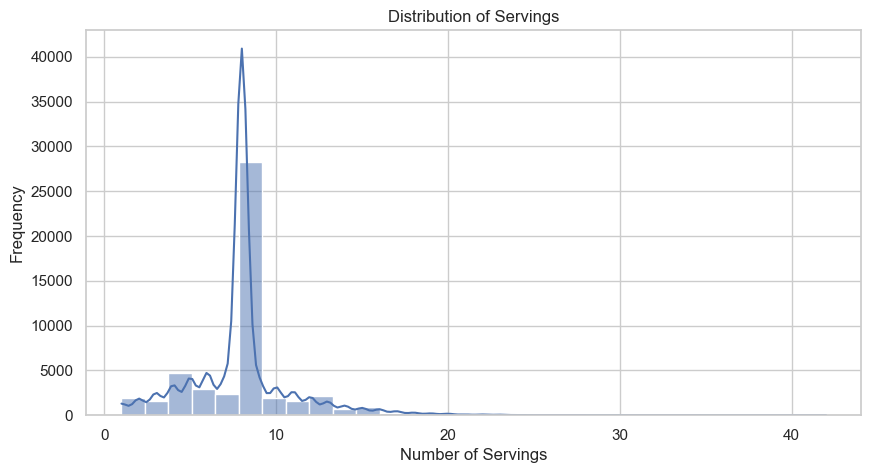

In [23]:


# 2. Distribution of Servings
plt.figure(figsize=(10, 5))
sns.histplot(df['Servings'], bins=30, kde=True)
plt.title("Distribution of Servings")
plt.xlabel("Number of Servings")
plt.ylabel("Frequency")
plt.show()

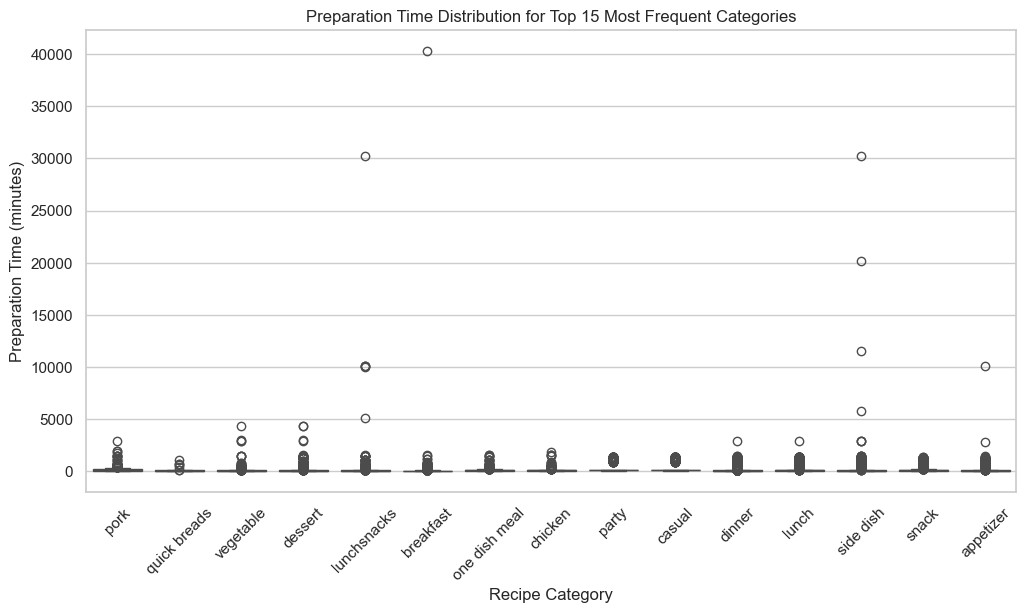

In [24]:
# Get the top 15 most frequent categories
top_categories = df['Category'].value_counts().nlargest(15).index

# Filter the dataset to include only the top 15 categories
filtered_df = df[df['Category'].isin(top_categories)]

# Plot the boxplot of Preparation Time for the top 15 categories
plt.figure(figsize=(12, 6))
sns.boxplot(x=filtered_df['Category'], y=filtered_df['Preparation time'])
plt.xticks(rotation=45)
plt.title("Preparation Time Distribution for Top 15 Most Frequent Categories")
plt.xlabel("Recipe Category")
plt.ylabel("Preparation Time (minutes)")
plt.show()


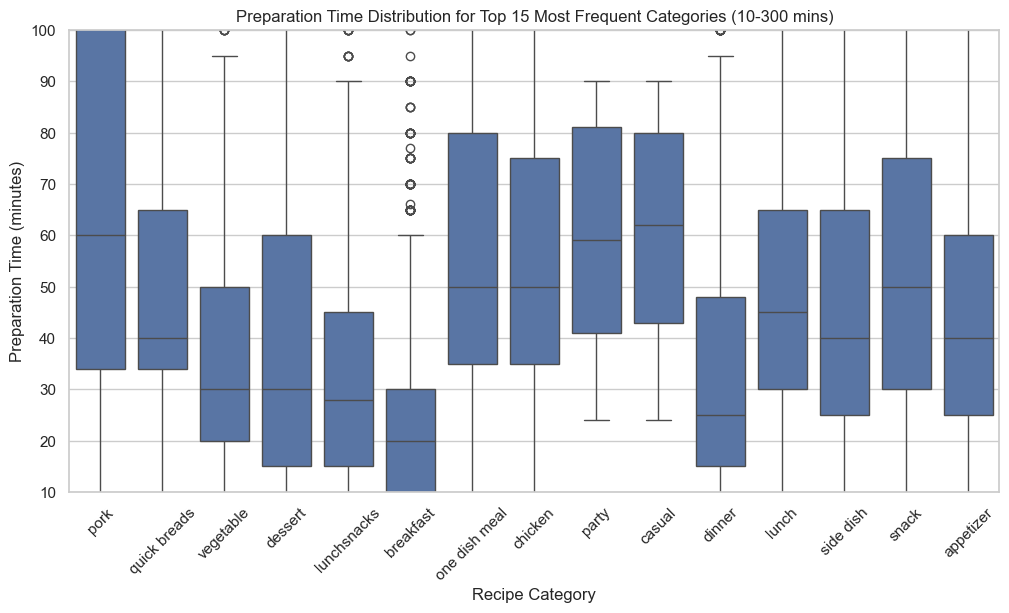

In [25]:
# Plot the boxplot of Preparation Time for the top 15 categories with y-axis limited to 10-300 minutes
plt.figure(figsize=(12, 6))
sns.boxplot(x=filtered_df['Category'], y=filtered_df['Preparation time'])
plt.xticks(rotation=45)
plt.ylim(10, 100)#et y-axis range from 10 to 300 minutes
plt.title("Preparation Time Distribution for Top 15 Most Frequent Categories (10-300 mins)")
plt.xlabel("Recipe Category")
plt.ylabel("Preparation Time (minutes)")
plt.show()


Top 15 most frequent categories:
 Category
dinner               6320
dessert              5841
lunch                3748
breakfast            1913
side dish            1622
lunchsnacks          1547
one dish meal        1353
vegetable            1323
party                1277
appetizer            1257
casual               1254
snack                1204
quick breads          707
chicken               700
pork                  672
potato                668
breads                637
no category found     606
appetizer snack       601
chicken breast        594
Name: count, dtype: int64


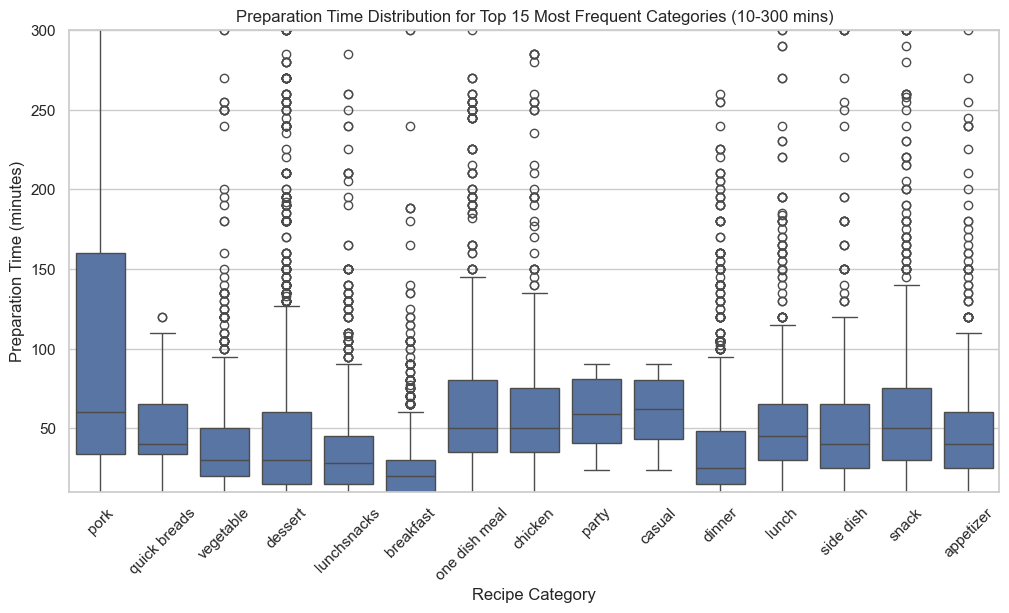

In [26]:
# Get the actual top 15 most frequent categories from the dataset
top_categories = df['Category'].value_counts().nlargest(15).index

# Filter the dataset to include only the top 15 categories
filtered_df = df[df['Category'].isin(top_categories)]

# Display the top 15 categories for verification
print("Top 15 most frequent categories:\n", df['Category'].value_counts().nlargest(20))

# Plot the boxplot of Preparation Time for the top 15 categories with y-axis limited to 10-300 minutes
plt.figure(figsize=(12, 6))
sns.boxplot(x=filtered_df['Category'], y=filtered_df['Preparation time'])
plt.xticks(rotation=45)
plt.ylim(10, 300)  # Set y-axis range from 10 to 300 minutes
plt.title("Preparation Time Distribution for Top 15 Most Frequent Categories (10-300 mins)")
plt.xlabel("Recipe Category")
plt.ylabel("Preparation Time (minutes)")
plt.show()


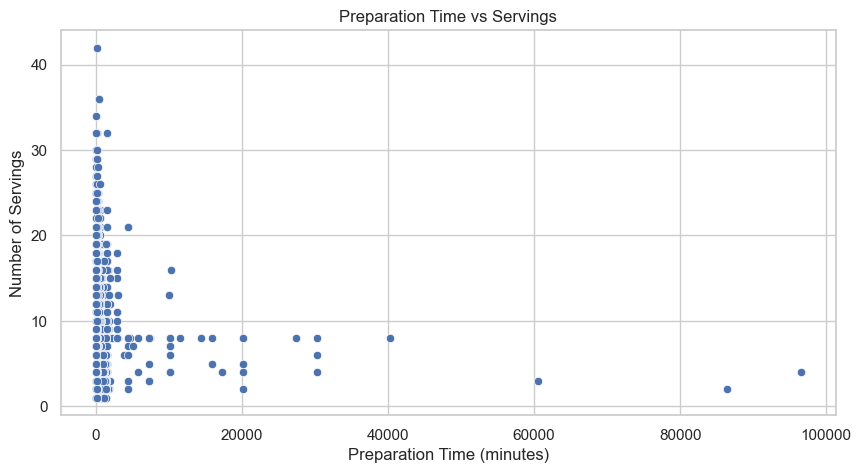

In [27]:
# 3. Preparation Time vs Servings (Scatter Plot)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Preparation time'], y=df['Servings'])
plt.title("Preparation Time vs Servings")
plt.xlabel("Preparation Time (minutes)")
plt.ylabel("Number of Servings")
plt.show()

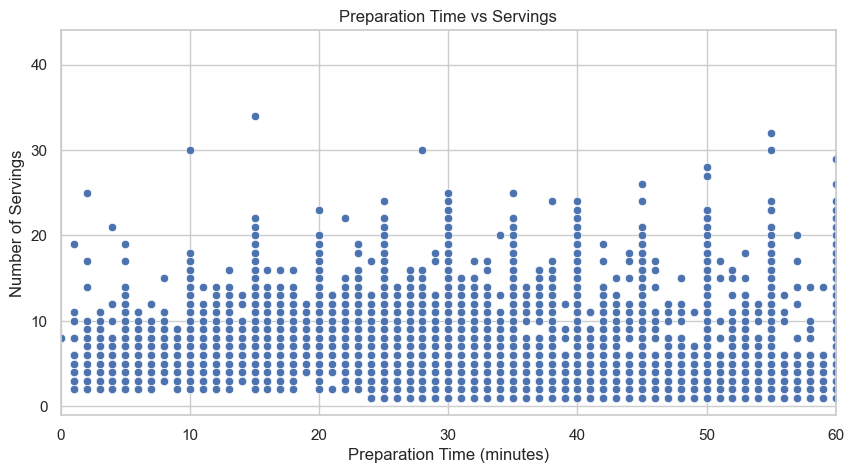

In [28]:
# Replot the scatter plot with adjusted x-axis (10 to 200 minutes)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Preparation time'], y=df['Servings'])
plt.title("Preparation Time vs Servings")
plt.xlabel("Preparation Time (minutes)")
plt.ylabel("Number of Servings")
plt.xlim(0, 60) # Set x-axis range from 10 to 200 minutes
plt.show()


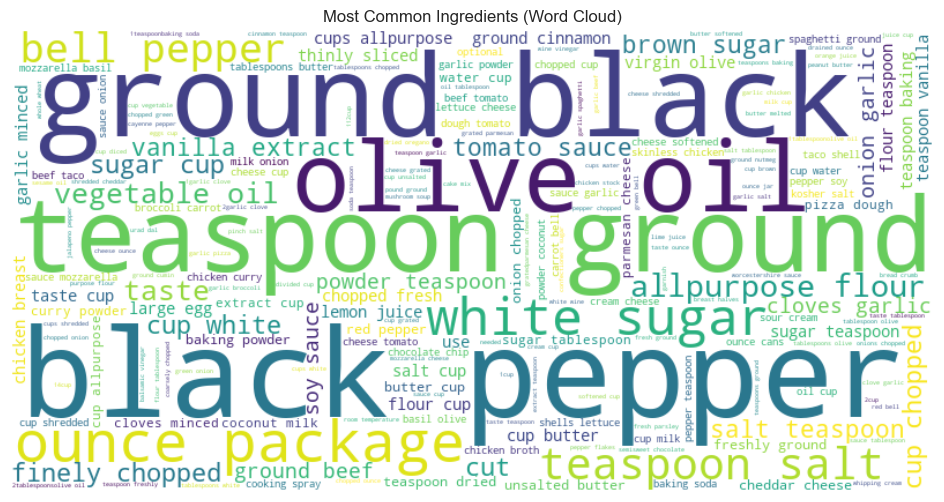

In [29]:
# 4. Word Cloud of Ingredients
from wordcloud import WordCloud

all_ingredients = ' '.join(df['List of ingredients'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_ingredients)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Ingredients (Word Cloud)")
plt.show()

In [31]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 2.0 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


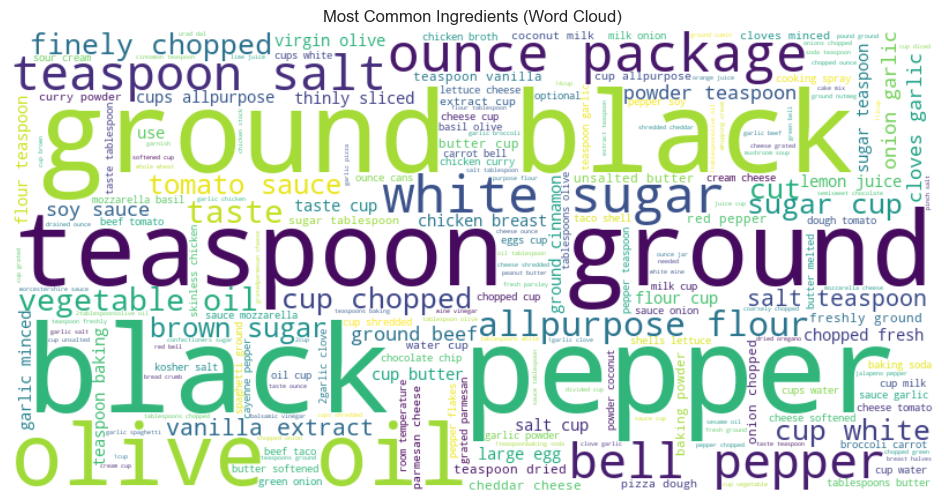


Top 20 Most Used Ingredients:

                                          Ingredient  Count
0  4cupswater 1teaspoonsalt 1cupquickcooking grit...      1


In [34]:
# Generate Word Cloud for Ingredients
from wordcloud import WordCloud

all_ingredients = ' '.join(df['List of ingredients'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_ingredients)

# Display Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Ingredients (Word Cloud)")
plt.show()

# Extract and print the 20 most commonly used ingredients
from collections import Counter

# Flatten the list of ingredients and count occurrences
all_ingredients_list = all_ingredients.split(',')  # Assuming ingredients are comma-separated
ingredient_counts = Counter(all_ingredients_list)

# Get the top 20 most commonly used ingredients
top_ingredients = ingredient_counts.most_common(20)

# Convert to DataFrame for display
ingredient_df = pd.DataFrame(top_ingredients, columns=['Ingredient', 'Count'])

# Convert the top 20 ingredients to a DataFrame for display
ingredient_df = pd.DataFrame(top_ingredients, columns=['Ingredient', 'Count'])

# Print the top 20 ingredients
print("\nTop 20 Most Used Ingredients:\n")
print(ingredient_df)


In [35]:
pip install unidecode

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import pandas as pd
import nltk
import string
import ast
import re
import unidecode
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer



# Define words to remove
measures = ['teaspoon', 't', 'tsp.', 'tablespoon', 'T', 'tbl.', 'tb', 'tbsp.', 'fluid ounce', 'fl oz', 'gill', 'cup',
            'c', 'pint', 'p', 'pt', 'fl pt', 'quart', 'q', 'qt', 'fl qt', 'gallon', 'g', 'gal', 'ml', 'milliliter',
            'millilitre', 'cc', 'mL', 'l', 'liter', 'litre', 'L', 'dl', 'deciliter', 'decilitre', 'dL', 'bulb', 'level',
            'heaped', 'rounded', 'whole', 'pinch', 'medium', 'slice', 'pound', 'lb', '#', 'ounce', 'oz', 'mg', 'milligram',
            'milligramme', 'g', 'gram', 'gramme', 'kg', 'kilogram', 'kilogramme', 'x', 'of', 'mm', 'millimetre',
            'millimeter', 'cm', 'centimeter', 'centimetre', 'm', 'meter', 'metre', 'inch', 'in', 'milli', 'centi', 'deci',
            'hecto', 'kilo']

words_to_remove = ['fresh', 'oil', 'a', 'red', 'bunch', 'and', 'clove', 'or', 'leaf', 'chilli', 'large', 'extra',
                   'sprig', 'ground', 'handful', 'free', 'small', 'pepper', 'virgin', 'range', 'from', 'dried',
                   'sustainable', 'black', 'peeled', 'higher', 'welfare', 'seed', 'for', 'finely', 'freshly', 'sea',
                   'quality', 'white', 'ripe', 'few', 'piece', 'source', 'to', 'organic', 'flat', 'smoked', 'ginger',
                   'sliced', 'green', 'picked', 'the', 'stick', 'plain', 'plus', 'mixed', 'mint', 'bay', 'basil',
                   'your', 'cumin', 'optional', 'fennel', 'serve', 'mustard', 'unsalted', 'baby', 'paprika', 'fat',
                   'ask', 'natural', 'skin', 'roughly', 'into', 'such', 'cut', 'good', 'brown', 'grated', 'trimmed',
                   'oregano', 'powder', 'yellow', 'dusting', 'knob', 'frozen', 'on', 'deseeded', 'low', 'runny',
                   'balsamic', 'cooked', 'streaky', 'nutmeg', 'sage', 'rasher', 'zest', 'pin', 'groundnut',
                   'breadcrumb', 'turmeric', 'halved', 'grating', 'stalk', 'light', 'tinned', 'dry', 'soft', 'rocket',
                   'bone', 'colour', 'washed', 'skinless', 'leftover', 'splash', 'removed', 'dijon', 'thick', 'big',
                   'hot', 'drained', 'sized', 'chestnut', 'watercress', 'fishmonger', 'english', 'dill', 'caper', 'raw',
                   'worcestershire', 'flake', 'cider', 'cayenne', 'tbsp', 'leg', 'pine', 'wild', 'if', 'fine', 'herb',
                   'almond', 'shoulder', 'cube', 'dressing', 'with', 'chunk', 'spice', 'thumb', 'garam', 'new',
                   'little', 'punnet', 'peppercorn', 'shelled', 'saffron', 'chopped', 'salt', 'olive', 'taste', 'can',
                   'sauce', 'water', 'diced', 'package', 'italian', 'shredded', 'divided', 'parsley', 'vinegar', 'all',
                   'purpose', 'crushed', 'juice', 'more', 'coriander', 'bell', 'needed', 'thinly', 'boneless', 'half',
                   'thyme', 'cubed', 'cinnamon', 'cilantro', 'jar', 'seasoning', 'rosemary', 'extract', 'sweet',
                   'baking', 'beaten', 'heavy', 'seeded', 'tin', 'vanilla', 'uncooked', 'crumb', 'style', 'thin', 'nut',
                   'coarsely', 'spring', 'chili', 'cornstarch', 'strip', 'cardamom', 'rinsed', 'honey', 'cherry',
                   'root', 'quartered', 'head', 'softened', 'container', 'crumbled', 'frying', 'lean', 'cooking',
                   'roasted', 'warm', 'whipping', 'thawed', 'corn', 'pitted', 'sun', 'kosher', 'bite', 'toasted',
                   'lasagna', 'split', 'melted', 'degree', 'lengthwise', 'romano', 'packed', 'pod', 'anchovy', 'rom',
                   'prepared', 'juiced', 'fluid', 'floret', 'room', 'active', 'seasoned', 'mix', 'deveined', 'lightly',
                   'anise', 'thai', 'size', 'unsweetened', 'torn', 'wedge', 'sour', 'basmati', 'marinara', 'dark',
                   'temperature', 'garnish', 'bouillon', 'loaf', 'shell', 'reggiano', 'canola', 'parmigiano', 'round',
                   'canned', 'ghee', 'crust', 'long', 'broken', 'ketchup', 'bulk', 'cleaned', 'condensed', 'sherry',
                   'provolone', 'cold', 'soda', 'cottage', 'spray', 'tamarind', 'pecorino', 'shortening', 'part',
                   'bottle', 'sodium', 'cocoa', 'grain', 'french', 'roast', 'stem', 'link', 'firm', 'asafoetida',
                   'mild', 'dash', 'boiling']

lemmatizer = WordNetLemmatizer()

def ingredient_parser(ingreds):
    if isinstance(ingreds, list):
        ingredients = ingreds
    else:
        ingredients = ast.literal_eval(ingreds)

    translator = str.maketrans('', '', string.punctuation)
    ingred_list = []

    for i in ingredients:
        i = i.translate(translator)
        items = re.split(' |-', i)
        items = [word.lower() for word in items if word.isalpha()]
        items = [unidecode.unidecode(word) for word in items]
        items = [lemmatizer.lemmatize(word) for word in items]
        items = [word for word in items if word not in measures and word not in words_to_remove]

        if items:
            ingred_list.append(' '.join(items))

    return " ".join(ingred_list)



# Apply the ingredient parser
df['List of ingredients'] = df['List of ingredients'].apply(ingredient_parser)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


SyntaxError: invalid decimal literal (<unknown>, line 1)

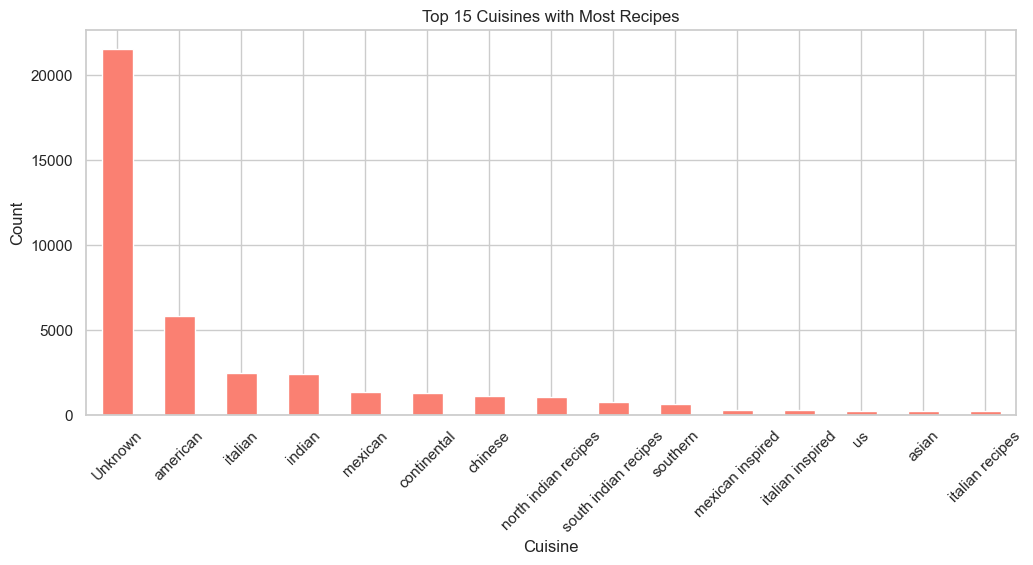

In [37]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
df["Region/Cuisine"] = df["Region/Cuisine"].astype(str).str.replace(r"[\[\]'\"]", "", regex=True).str.strip()
df["Region/Cuisine"] = df["Region/Cuisine"].replace("nan", np.nan)
df_cleaned = df.dropna(subset=["Region/Cuisine"])
df_cleaned = df_cleaned[~df_cleaned["Region/Cuisine"].str.strip().str.lower().eq("no cuisine found")]
top_cuisines = df_cleaned["Region/Cuisine"].value_counts().nlargest(15)
top_cuisines.plot(kind='bar', color='salmon')
plt.xlabel("Cuisine")
plt.ylabel("Count")
plt.title("Top 15 Cuisines with Most Recipes")
plt.xticks(rotation=45)
plt.show()


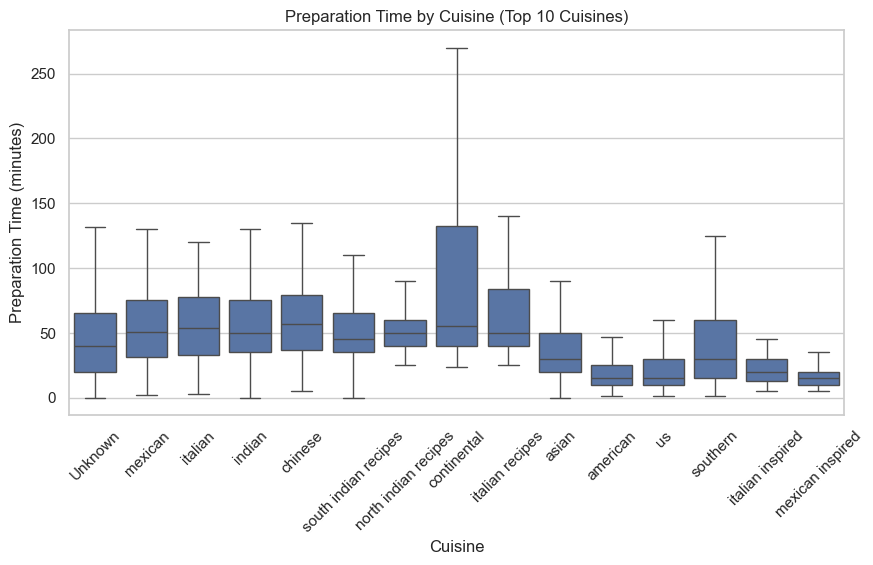

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
top_cuisine_list = top_cuisines.index.tolist()
df_filtered = df[df["Region/Cuisine"].isin(top_cuisine_list)].copy()
df_filtered["Preparation time"] = pd.to_numeric(df_filtered["Preparation time"], errors='coerce')
df_filtered = df_filtered.dropna(subset=["Preparation time"])
df_filtered = df_filtered[df_filtered["Region/Cuisine"].isin(df_filtered["Region/Cuisine"].value_counts().index)]
plt.figure(figsize=(10,5))
sns.boxplot(x=df_filtered["Region/Cuisine"], y=df_filtered["Preparation time"], showfliers=False)
plt.xticks(rotation=45)
plt.xlabel("Cuisine")
plt.ylabel("Preparation Time (minutes)")
plt.title("Preparation Time by Cuisine (Top 10 Cuisines)")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11764\4003243712.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_prep_time.index, y=avg_prep_time.values, palette="viridis")


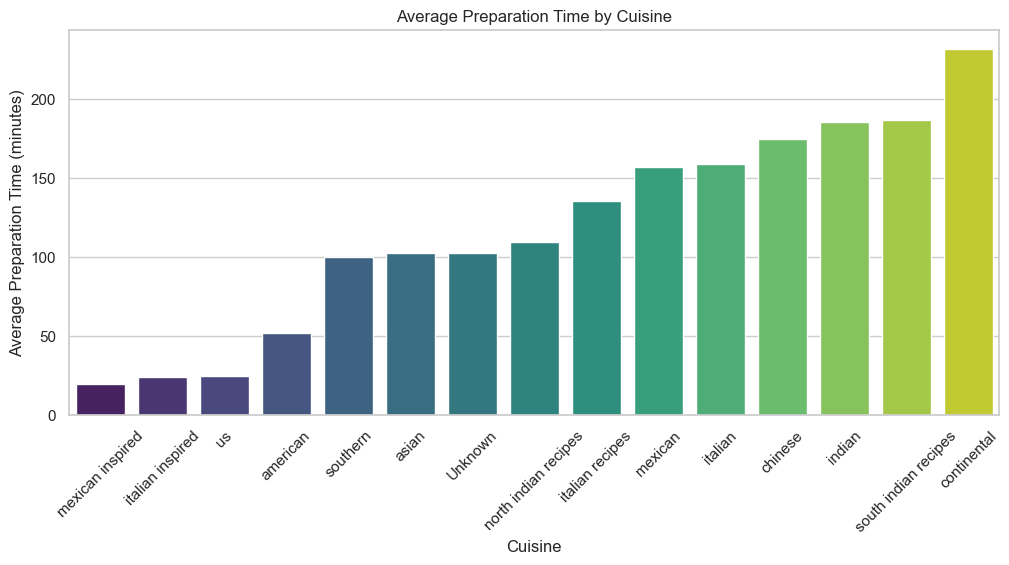

In [39]:
plt.figure(figsize=(12,5))
avg_prep_time = df_filtered.groupby("Region/Cuisine")["Preparation time"].mean().sort_values()
sns.barplot(x=avg_prep_time.index, y=avg_prep_time.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Cuisine")
plt.ylabel("Average Preparation Time (minutes)")
plt.title("Average Preparation Time by Cuisine")
plt.show()
